In [13]:
!pip install opencv-python mediapipe ipywidgets matplotlib

In [19]:
import sys
import cv2
import mediapipe as mp
from pathlib import Path
from typing import Optional, List, Tuple
import os
import matplotlib.pyplot as plt

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("OpenCV version:", cv2.__version__)
print("MediaPipe version:", mp.__version__)

Python executable: C:\Users\manik\anaconda3\envs\mp_env\python.exe
Python version: 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]
OpenCV version: 4.12.0
MediaPipe version: 0.10.14


In [24]:
# Path to your MediaPipe .task model file
MODEL_PATH = r"C:\Users\manik\Desktop\ML Project\gesture_recognizer.task"
  # Make sure this file is in the same folder

# MediaPipe shortcuts
BaseOptions = mp.tasks.BaseOptions
GestureRecognizer = mp.tasks.vision.GestureRecognizer
GestureRecognizerOptions = mp.tasks.vision.GestureRecognizerOptions
RunningMode = mp.tasks.vision.RunningMode
Image = mp.Image

# Hand connections for drawing
HAND_CONNECTIONS = [
    (0,1),(1,2),(2,3),(3,4),
    (0,5),(5,6),(6,7),(7,8),
    (5,9),(9,10),(10,11),(11,12),
    (9,13),(13,14),(14,15),(15,16),
    (13,17),(17,18),(18,19),(19,20),
    (0,17)
]

In [25]:
def draw_landmarks(frame, hand_landmarks):
    """Draw hand landmarks and connections."""
    h, w = frame.shape[:2]
    pts = [(int((1.0 - lm.x) * w), int(lm.y * h)) for lm in hand_landmarks]
    
    for a, b in HAND_CONNECTIONS:
        if a < len(pts) and b < len(pts):
            cv2.line(frame, pts[a], pts[b], (0, 255, 0), 2)
    
    for (x, y) in pts:
        cv2.circle(frame, (x, y), 4, (0, 0, 255), -1)
    
    return frame

In [26]:
def recognize_gestures_from_folder(folder_path, save_output=False):
    """Process all images in a folder and recognize gestures."""
    # --- Initialize recognizer ---
    options = GestureRecognizerOptions(
        base_options=BaseOptions(model_asset_path=str(MODEL_PATH)),
        running_mode=RunningMode.IMAGE
    )

    # Get all image files in folder
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp')
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(image_extensions)]

    if not image_files:
        print("❌ No image files found in the folder.")
        return

    with GestureRecognizer.create_from_options(options) as recognizer:
        for img_file in image_files:
            image_path = os.path.join(folder_path, img_file)
            frame = cv2.imread(str(image_path))
            if frame is None:
                print(f"⚠️ Skipping unreadable file: {img_file}")
                continue

            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)

            result = recognizer.recognize(mp_image)

            if result and result.gestures:
                gesture = result.gestures[0][0]
                handedness = result.handedness[0][0].category_name
                print(f"✅ {img_file}: {handedness} hand - {gesture.category_name} ({gesture.score:.2f})")
                text = f"{gesture.category_name} ({gesture.score:.2f})"
                cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            else:
                print(f"⚠️ {img_file}: No gesture detected.")

            # Draw landmarks if available
            if result.hand_landmarks:
                frame = draw_landmarks(frame, result.hand_landmarks[0])

            # Show the image with annotations
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.imshow(frame_rgb)
            plt.title(img_file)
            plt.axis("off")
            plt.show()

            # Save output image if needed
            if save_output:
                output_dir = os.path.join(folder_path, "outputs")
                os.makedirs(output_dir, exist_ok=True)
                output_path = os.path.join(output_dir, f"annotated_{img_file}")
                cv2.imwrite(output_path, frame)

C:\Users\manik\anaconda3\envs\mp_env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


✅ frame_02_01_0001.png: Left hand - Open_Palm (0.50)


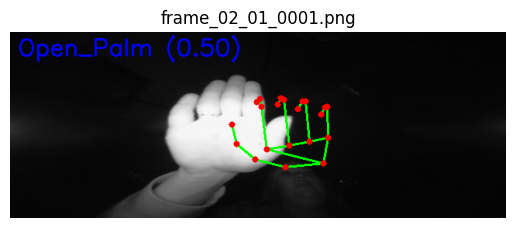

✅ frame_02_01_0009.png: Left hand - None (0.55)


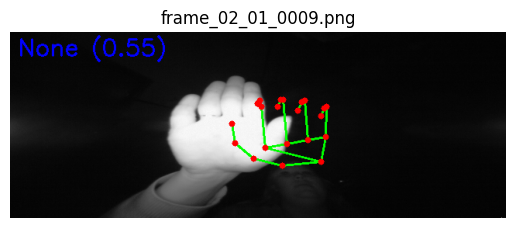

✅ frame_02_01_0017.png: Left hand - None (0.73)


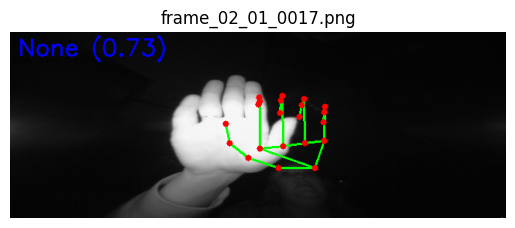

✅ frame_02_01_0025.png: Left hand - Open_Palm (0.71)


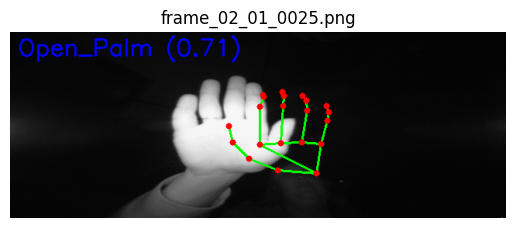

✅ frame_02_01_0033.png: Left hand - Open_Palm (0.59)


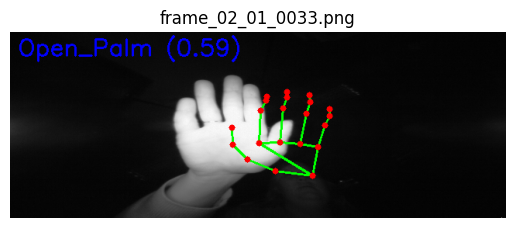

✅ frame_02_02_0001.png: Left hand - None (0.49)


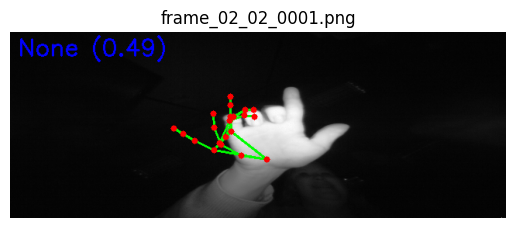

⚠️ frame_02_02_0009.png: No gesture detected.


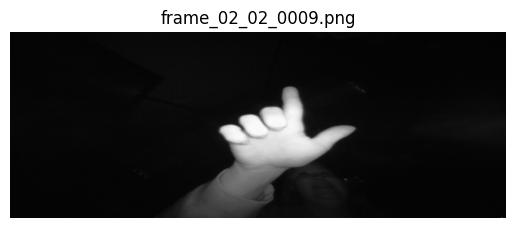

✅ frame_02_02_0017.png: Left hand - None (0.58)


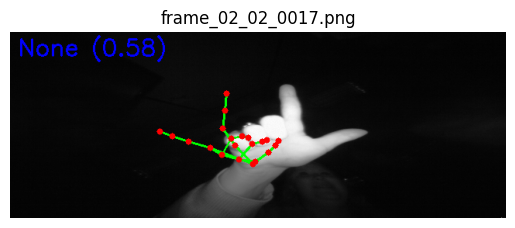

⚠️ frame_02_02_0025.png: No gesture detected.


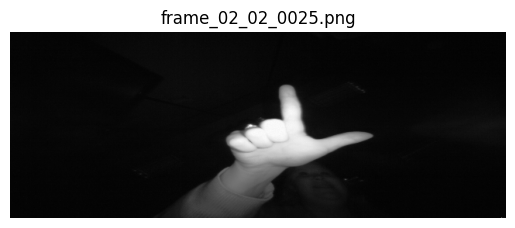

✅ frame_02_02_0033.png: Left hand - None (0.50)


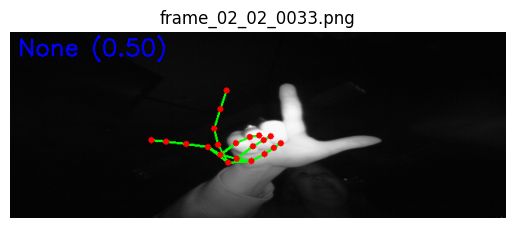

⚠️ frame_02_03_0001.png: No gesture detected.


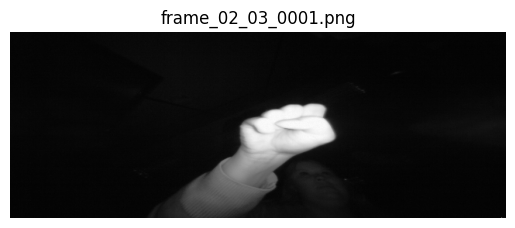

⚠️ frame_02_03_0009.png: No gesture detected.


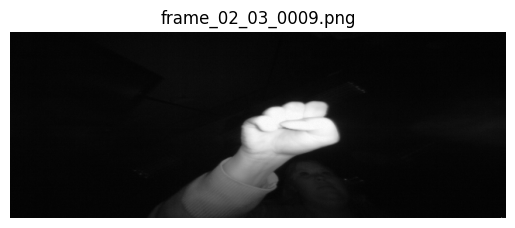

⚠️ frame_02_03_0017.png: No gesture detected.


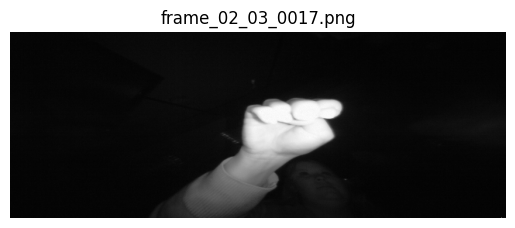

⚠️ frame_02_03_0025.png: No gesture detected.


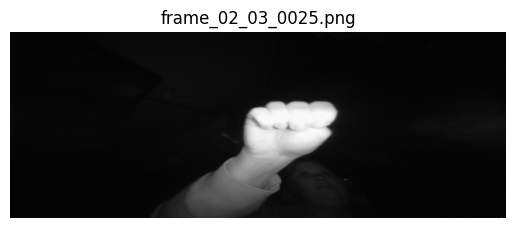

⚠️ frame_02_03_0033.png: No gesture detected.


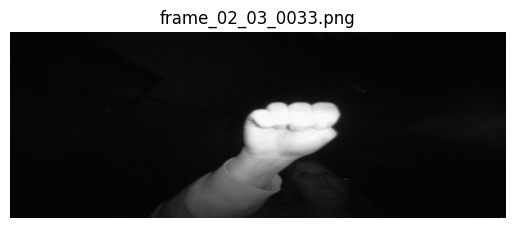

⚠️ frame_02_04_0001.png: No gesture detected.


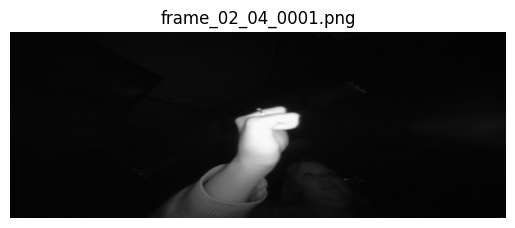

⚠️ frame_02_04_0009.png: No gesture detected.


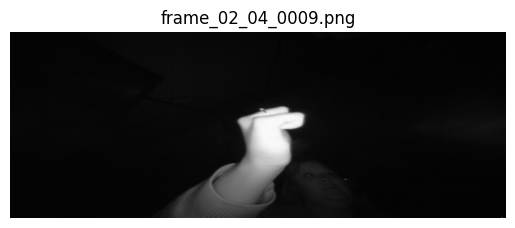

⚠️ frame_02_04_0017.png: No gesture detected.


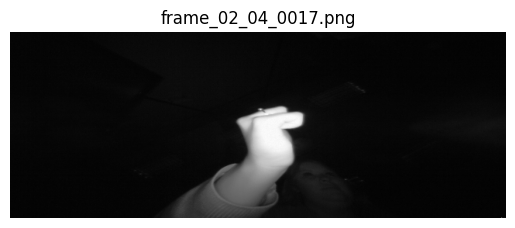

⚠️ frame_02_04_0025.png: No gesture detected.


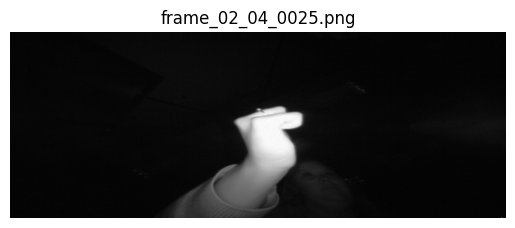

⚠️ frame_02_04_0033.png: No gesture detected.


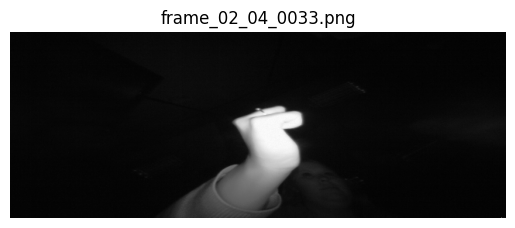

✅ frame_02_05_0001.png: Right hand - None (0.86)


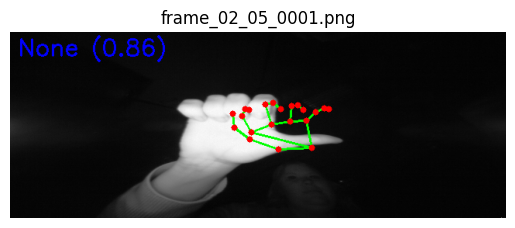

✅ frame_02_05_0009.png: Right hand - None (0.91)


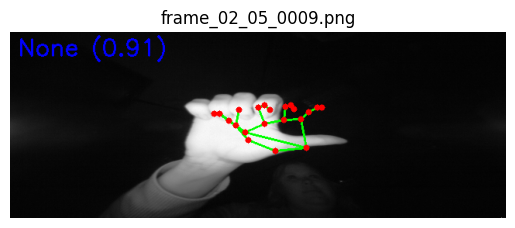

✅ frame_02_05_0017.png: Right hand - None (0.86)


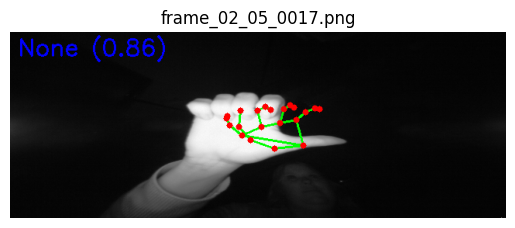

✅ frame_02_05_0025.png: Right hand - None (0.89)


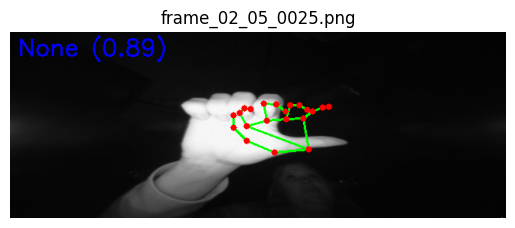

✅ frame_02_05_0033.png: Right hand - None (0.94)


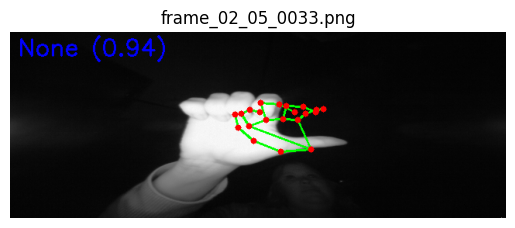

⚠️ frame_02_06_0001.png: No gesture detected.


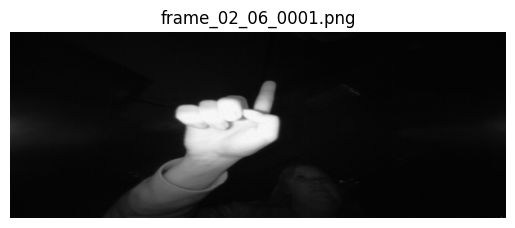

⚠️ frame_02_06_0009.png: No gesture detected.


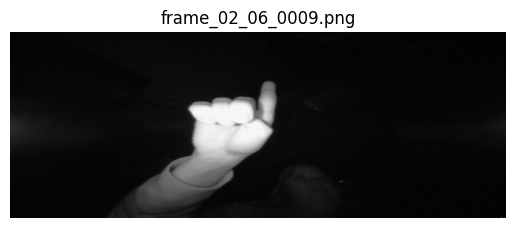

✅ frame_02_06_0017.png: Right hand - None (0.64)


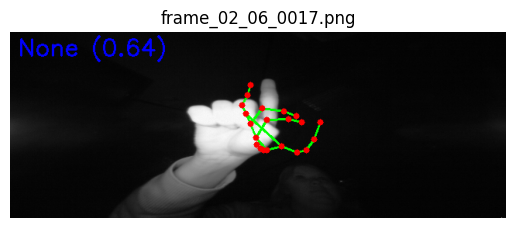

⚠️ frame_02_06_0025.png: No gesture detected.


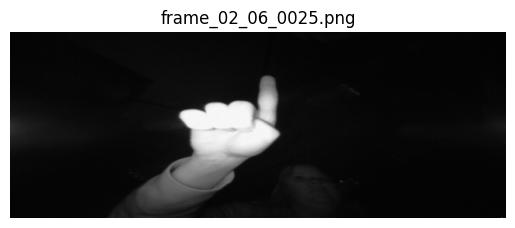

⚠️ frame_02_06_0033.png: No gesture detected.


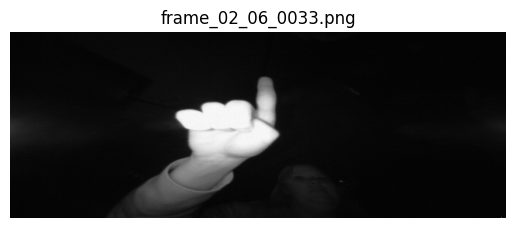

✅ frame_02_07_0001.png: Left hand - None (0.95)


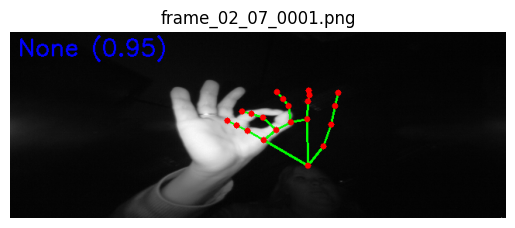

✅ frame_02_07_0009.png: Left hand - None (0.88)


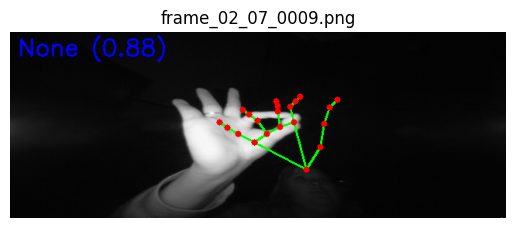

✅ frame_02_07_0017.png: Left hand - None (0.90)


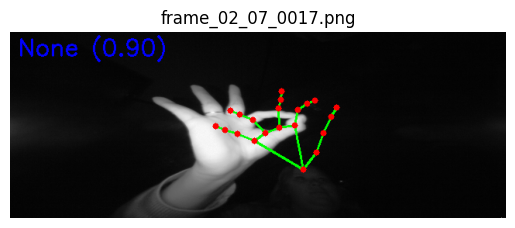

✅ frame_02_07_0025.png: Left hand - None (0.91)


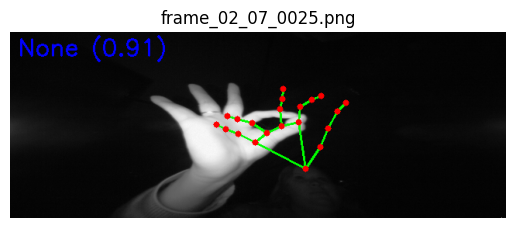

✅ frame_02_07_0033.png: Left hand - None (0.91)


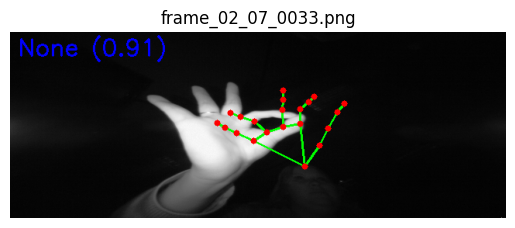

⚠️ frame_02_08_0001.png: No gesture detected.


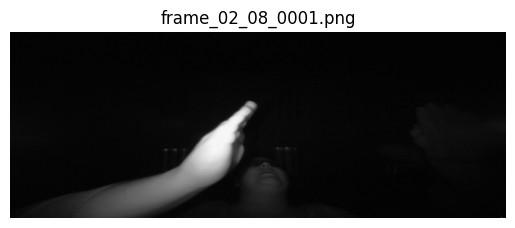

⚠️ frame_02_08_0009.png: No gesture detected.


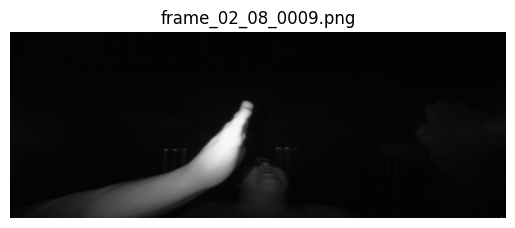

⚠️ frame_02_08_0017.png: No gesture detected.


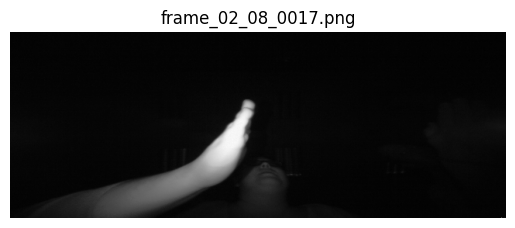

⚠️ frame_02_08_0025.png: No gesture detected.


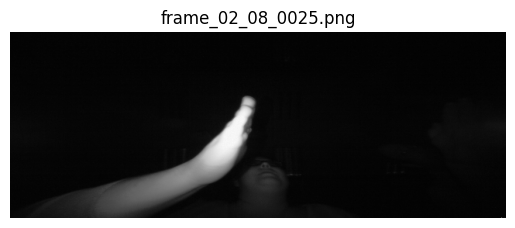

⚠️ frame_02_08_0033.png: No gesture detected.


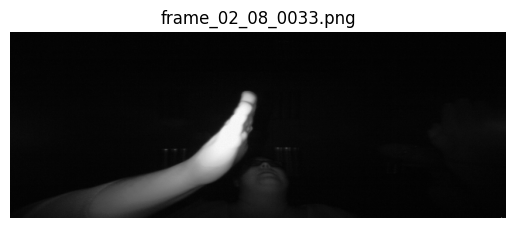

✅ frame_02_09_0001.png: Right hand - None (0.94)


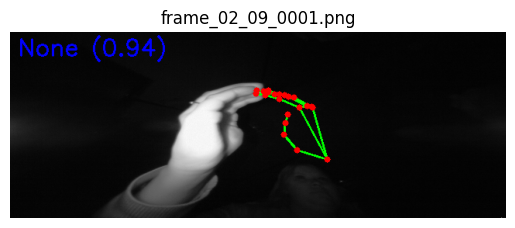

⚠️ frame_02_09_0009.png: No gesture detected.


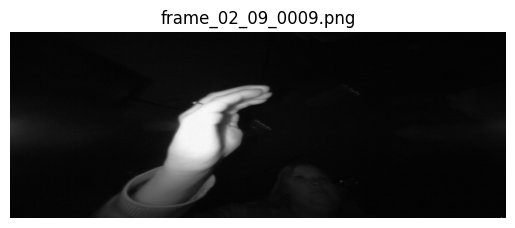

⚠️ frame_02_09_0017.png: No gesture detected.


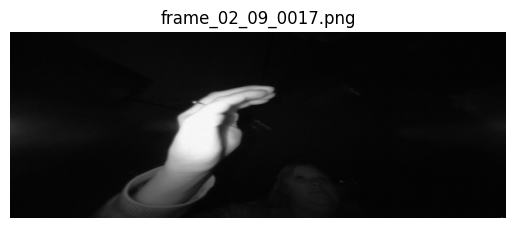

⚠️ frame_02_09_0025.png: No gesture detected.


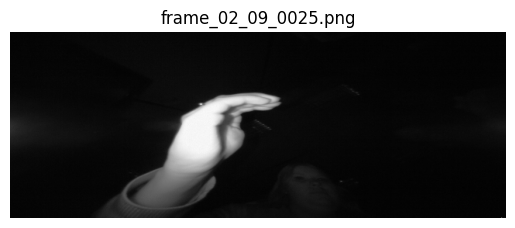

⚠️ frame_02_09_0033.png: No gesture detected.


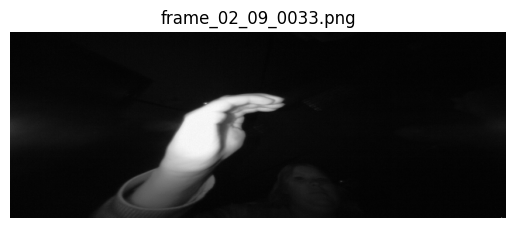

✅ frame_02_10_0001.png: Right hand - None (0.70)


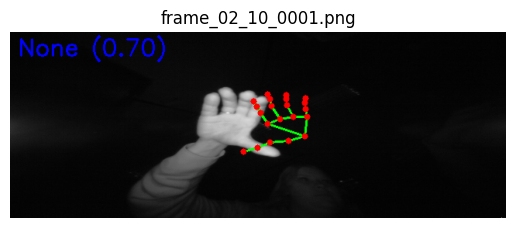

✅ frame_02_10_0009.png: Right hand - None (0.65)


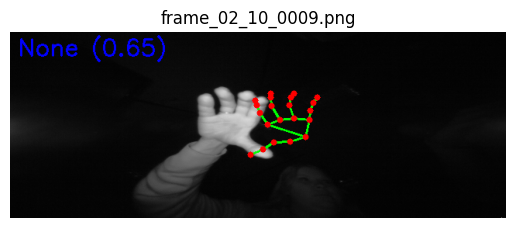

✅ frame_02_10_0017.png: Right hand - None (0.73)


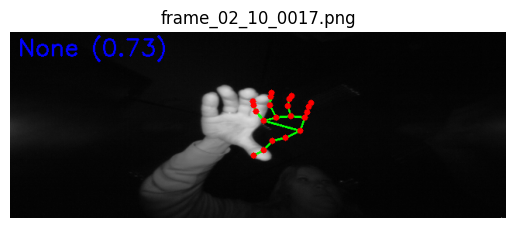

⚠️ frame_02_10_0025.png: No gesture detected.


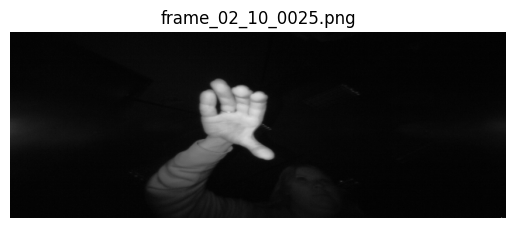

⚠️ frame_02_10_0033.png: No gesture detected.


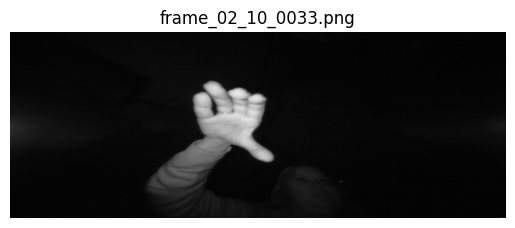

In [27]:
# Replace this path with the actual path where your 50 images are
folder_path = "C:\\Users\\manik\\Desktop\\ML Project\\Gestures\\leapGestRecog\\02\\hand-gesture-sample-dataset"

# Run the recognition function
recognize_gestures_from_folder(folder_path, save_output=True)